In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [131]:
#Load data file
orders = pd.read_excel('Dataset.xlsx')
orders

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840
9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041
9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036
9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135


In [132]:
#Column info (Check type + NA value)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB


In [133]:
#Load data from "Return" sheet
returned = pd.read_excel('Dataset.xlsx', sheet_name='Return')
returned

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999
...,...,...
291,Yes,CA-2015-101910
292,Yes,CA-2017-156958
293,Yes,CA-2016-105585
294,Yes,CA-2016-148796


In [134]:
#Remove returned orders
orders2 = orders.merge(returned, how="left", on="Order ID").reset_index()
success_orders = orders2[orders2.Returned.isna()]
success_orders

,index,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Returned
0,0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,NaN
1,1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,NaN
2,2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,NaN
3,3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,NaN
6,6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840,NaN
9990,9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041,NaN
9991,9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036,NaN
9992,9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135,NaN


In [135]:
#Calculate RFM
#Recency
max_orderdate = success_orders.groupby('Customer ID')['Order Date'].max().reset_index()
max_orderdate.columns = ['Customer ID', 'Max Order Date']
max_orderdate

,Customer ID,Max Order Date
0,AA-10315,2017-06-29
1,AA-10375,2017-12-11
2,AA-10480,2017-04-15
3,AA-10645,2016-09-04
4,AB-10015,2016-11-10
...,...,...
786,XP-21865,2017-10-09
787,YC-21895,2017-12-26
788,YS-21880,2017-12-21
789,ZC-21910,2017-11-06


In [136]:
import datetime
current_date = datetime.datetime(2017,12,31)
max_orderdate ['Recency']  = (current_date - max_orderdate['Max Order Date']).dt.days
max_orderdate

,Customer ID,Max Order Date,Recency
0,AA-10315,2017-06-29,185
1,AA-10375,2017-12-11,20
2,AA-10480,2017-04-15,260
3,AA-10645,2016-09-04,483
4,AB-10015,2016-11-10,416
...,...,...,...
786,XP-21865,2017-10-09,83
787,YC-21895,2017-12-26,5
788,YS-21880,2017-12-21,10
789,ZC-21910,2017-11-06,55


In [137]:
#Frequency
order_fre = success_orders.groupby('Customer ID')['Order ID'].nunique().reset_index()
order_fre.columns = ['Order ID', 'Frequency']
order_fre

,Order ID,Frequency
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,5
4,AB-10015,3
...,...,...
786,XP-21865,9
787,YC-21895,4
788,YS-21880,8
789,ZC-21910,12


In [138]:
#Monetary
rfm_cal = success_orders.groupby(['Customer ID']).agg(
    {'Order Date': lambda x: (current_date - x.max()).days,
    'Order ID': 'nunique',
    "Sales":'sum',
    'Quantity':'sum'}
)
rfm_cal

,Order Date,Order ID,Sales,Quantity
Customer ID,,,,
AA-10315,185,5,5563.560,30
AA-10375,20,9,1056.390,41
AA-10480,260,4,1790.512,36
AA-10645,483,5,5073.975,62
AB-10015,416,3,886.156,13
...,...,...,...,...
XP-21865,83,9,2110.726,89
YC-21895,5,4,5438.650,26
YS-21880,10,8,6720.444,58


In [139]:
rfm_cal.rename(columns={'Order Date':'Recency','Order ID':'Frequency','Sales':'Monetary'}, inplace=True)
rfm_cal

,Recency,Frequency,Monetary,Quantity
Customer ID,,,,
AA-10315,185,5,5563.560,30
AA-10375,20,9,1056.390,41
AA-10480,260,4,1790.512,36
AA-10645,483,5,5073.975,62
AB-10015,416,3,886.156,13
...,...,...,...,...
XP-21865,83,9,2110.726,89
YC-21895,5,4,5438.650,26
YS-21880,10,8,6720.444,58


In [140]:
rfm_cal['Rec_score'] = pd.qcut(rfm_cal['Recency'],5,[1,2,3,4,5])
rfm_cal['Fre_score'] = pd.qcut(rfm_cal['Frequency'],5,[1,2,3,4,5])
rfm_cal['Mon_score'] = pd.qcut(rfm_cal['Monetary'],5,[1,2,3,4,5])
rfm_cal

,Recency,Frequency,Monetary,Quantity,Rec_score,Fre_score,Mon_score
Customer ID,,,,,,,
AA-10315,185,5,5563.560,30,4,2,5
AA-10375,20,9,1056.390,41,1,5,2
AA-10480,260,4,1790.512,36,4,1,3
AA-10645,483,5,5073.975,62,5,2,5
AB-10015,416,3,886.156,13,5,1,2
...,...,...,...,...,...,...,...
XP-21865,83,9,2110.726,89,3,5,3
YC-21895,5,4,5438.650,26,1,1,5
YS-21880,10,8,6720.444,58,1,4,5


In [141]:
rfm_cal['RFM_score'] = rfm_cal['Rec_score'].astype(str) + rfm_cal['Fre_score'].astype(str) + rfm_cal['Mon_score'].astype(str)
rfm_cal['RFM_score'] = pd.to_numeric(rfm_cal['RFM_score'])
rfm_cal

,Recency,Frequency,Monetary,Quantity,Rec_score,Fre_score,Mon_score,RFM_score
Customer ID,,,,,,,,
AA-10315,185,5,5563.560,30,4,2,5,425
AA-10375,20,9,1056.390,41,1,5,2,152
AA-10480,260,4,1790.512,36,4,1,3,413
AA-10645,483,5,5073.975,62,5,2,5,525
AB-10015,416,3,886.156,13,5,1,2,512
...,...,...,...,...,...,...,...,...
XP-21865,83,9,2110.726,89,3,5,3,353
YC-21895,5,4,5438.650,26,1,1,5,115
YS-21880,10,8,6720.444,58,1,4,5,145


In [142]:
#Load segment data
seg = pd.read_excel('Dataset.xlsx', sheet_name='Segmentation')
seg

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [143]:
#Add to list
seg['RFM Score'] = seg['RFM Score'].str.split(",")
seg

,Segment,RFM Score
0,Champions,"[555, 554, 544, 545, 454, 455, 445]"
1,Loyal,"[543, 444, 435, 355, 354, 345, 344, 335]"
2,Potential Loyalist,"[553, 551, 552, 541, 542, 533, 532, 531..."
3,New Customers,"[512, 511, 422, 421, 412, 411, 311]"
4,Promising,"[525, 524, 523, 522, 521, 515, 514, 513..."
5,Need Attention,"[535, 534, 443, 434, 343, 334, 325, 324]"
6,About To Sleep,"[331, 321, 312, 221, 213, 231, 241, 251]"
7,At Risk,"[255, 254, 245, 244, 253, 252, 243, 242..."
8,Cannot Lose Them,"[155, 154, 144, 214, 215, 115, 114, 113]"
9,Hibernating customers,"[332, 322, 233, 232, 223, 222, 132, 123..."


In [144]:
#Add refer table
refer_table = seg.set_index(["Segment"])['RFM Score'].apply(pd.Series).stack().reset_index().drop(columns='level_1').rename(columns={0: 'RFM_score'})
refer_table['RFM_score'] = pd.to_numeric(refer_table['RFM_score'])
refer_table

,Segment,RFM_score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [145]:
rfm_cal = rfm_cal.merge(refer_table, how="left", on="RFM_score").reset_index().drop(columns='index')
rfm_cal

,Recency,Frequency,Monetary,Quantity,Rec_score,Fre_score,Mon_score,RFM_score,Segment
0,185,5,5563.560,30,4,2,5,425,Promising
1,20,9,1056.390,41,1,5,2,152,At Risk
2,260,4,1790.512,36,4,1,3,413,Promising
3,483,5,5073.975,62,5,2,5,525,Promising
4,416,3,886.156,13,5,1,2,512,New Customers
...,...,...,...,...,...,...,...,...,...
786,83,9,2110.726,89,3,5,3,353,Potential Loyalist
787,5,4,5438.650,26,1,1,5,115,Cannot Lose Them
788,10,8,6720.444,58,1,4,5,145,At Risk
789,55,12,7892.998,94,2,5,5,255,At Risk


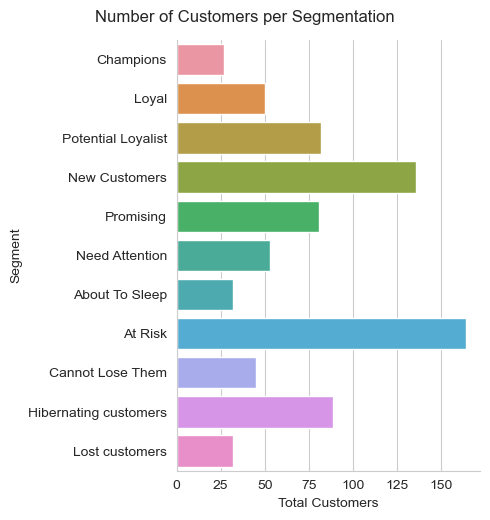

In [146]:
category_order = ['Champions', 
'Loyal',
'Potential Loyalist',
'New Customers',
'Promising',
'Need Attention',
'About To Sleep',
'At Risk',
'Cannot Lose Them',
'Hibernating customers',
'Lost customers']

sns.set_style("whitegrid")
g = sns.catplot(y="Segment", data=rfm_cal, orient='h', kind="count", order=category_order)
g.fig.suptitle("Number of Customers per Segmentation", y=1.03)
g.set(xlabel="Total Customers")
plt.show()

In [147]:
#Calculate Revenue per segmentation
rev_per_seg = rfm_cal.groupby(['Segment']).agg(
    {'Monetary':'sum'})
rev_per_seg

,Monetary
Segment,
About To Sleep,32081.1422
At Risk,639652.2790
Cannot Lose Them,220740.7833
Champions,146766.4295
Hibernating customers,116319.4680
Lost customers,19832.6390
Loyal,244915.7437
Need Attention,186671.4894
New Customers,93087.4775


In [157]:
import plotly.express as px
import plotly
values = ['Monetary']
names = ['Segment']

fig = px.pie(rev_per_seg, values= values, names= names, title = 'Revenue per Segment', autopct = '%2.1f%%')
fig.show()

TypeError: pie() got an unexpected keyword argument 'autopct'

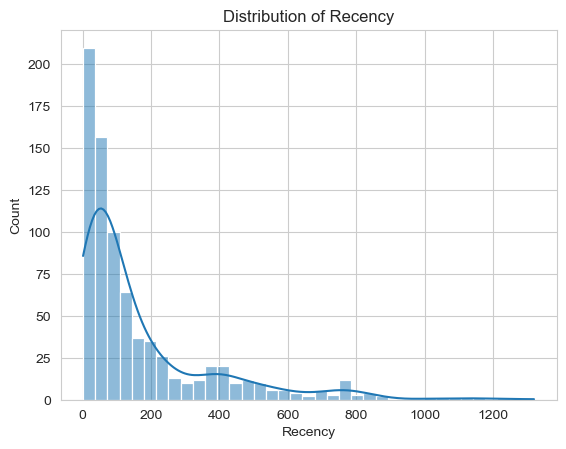

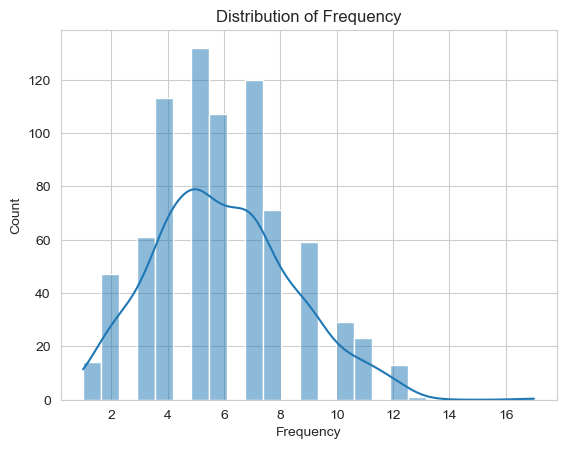

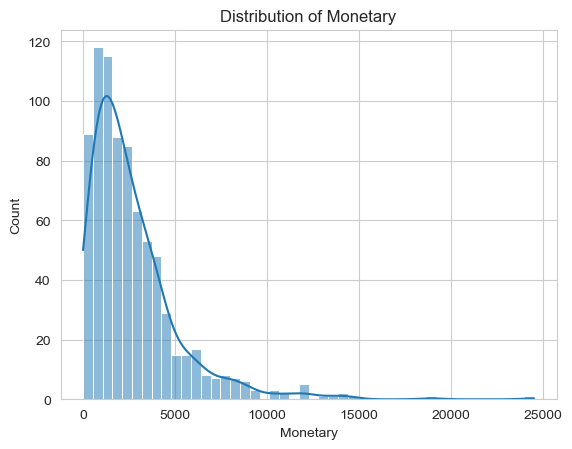

In [ ]:
colnames = [rfm_cal['Recency'], rfm_cal['Frequency'], rfm_cal['Monetary']]
for col in colnames:
    sns.histplot(col, kde=True)
    plt.title('Distribution of %s' %col.name, loc="center")
    plt.show()

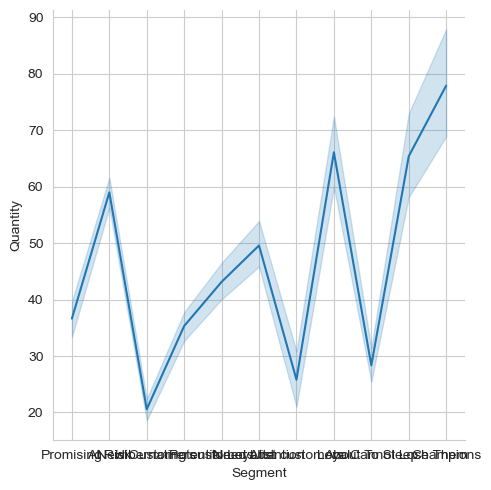

In [ ]:
#Line chart Quantity
sns.relplot(x='Segment', y='Quantity', data=rfm_cal, kind='line')
plt.show()

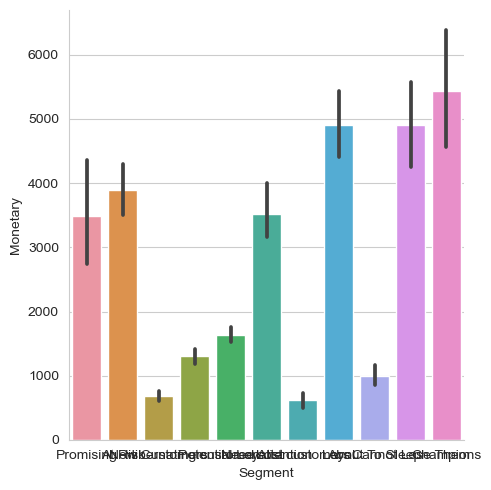

In [ ]:
#Bar chart Quantity
sns.catplot(x='Segment', y='Monetary', data=rfm_cal, kind='bar')
plt.show()